# 项目：调查未前往就诊的挂号预约数据集

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='intro'></a>
## 简介
该数据统计了病人挂号预约后是否按时就诊的统计情况。  
数据有110527行，14列，统计的特征有病人的ID，性别，实际就诊时间，预约就诊时间，是否前往就诊情况等。详细如下：  
PatientId :病人Id  
AppointmentID :预约号  
Gender :性别  
ScheduledDay :预约就诊时间  
AppointmentDay :约定时间  
Age :年龄  
Neighbourhood :居住地  
Scholarship :学历  
Hipertension :高血压情况  
Diabetes :糖尿病情况  
Alcoholism :酗酒情况  
Handcap :不利因素  
SMS_received :是否收到预约消息。  
No-show :是否就诊，yes表示没有去，no按时就诊。  
### 提出问题
结合数据，根据实际经验来分析。通常病人预约就诊但最终没有出现，原因大多是因为某些事情的阻隔，主要牵扯到病人自身的行为属性。当然医院是否有准备发送预约消息等也会有影响（SMS_received），但目前医院的基础设施十分健全，出现这种情况较少。因此我这里提出的问题主要是针对病人自身的情况来分析。  
1. 未前往就诊是否与预约病人年纪有关？
2. 未前往就诊是否与预约病人性别有关？
3. 未前往就诊是否与预约时间有关系？

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#path
DIR_SRC = os.path.abspath(os.path.dirname("__name__"))
DIR_ROOT = os.path.dirname(DIR_SRC)
DIR_DATA = os.path.join(DIR_ROOT, 'data/')

PATH_DATA = os.path.join(DIR_DATA, 'noshowappointments-kagglev2-may-2016.csv')

<a id='wrangling'></a>
## 数据整理

> **提示**：在报告的这一部分中载入数据，检查简洁度，然后整理和清理数据集，以便进行分析。请务必将步骤仔细归档，并确定清理决策是否正确。

### 常规属性

In [2]:
# data visualization
data = pd.read_csv(PATH_DATA)
print("数据量为{:d}行，{:d}列".format(data.shape[0],data.shape[1]))
data.head()

数据量为110527行，14列


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# 查看缺失值
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


小结：数据集中未出现缺失值。

### 数据清理

In [4]:
data_analysis = pd.DataFrame(data, columns=['PatientId','Gender','ScheduledDay','AppointmentDay','Age','No-show'])

In [5]:
# 清理病人Id列
id_max = data_analysis['PatientId'].max().astype('int64')
data_analysis['PatientId'] = data_analysis['PatientId'].astype('int64').astype('str')
data_analysis['PatientId'] = data_analysis['PatientId'].str.zfill(len(str(id_max)))
data_analysis.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,No-show
0,029872499824296,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,No
1,558997776694438,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,No
2,004262962299951,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,No
3,000867951213174,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,No
4,008841186448183,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,No


In [6]:
# 清洗No-show列，用0和1替换，便于统计分析
data_analysis['No-show'] = data_analysis['No-show'].map({'No':0, 'Yes':1})
data_analysis.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,No-show
0,029872499824296,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,0
1,558997776694438,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,0
2,004262962299951,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,0
3,000867951213174,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,0
4,008841186448183,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,0


In [7]:
# 统计时间类型为str，无法进行运算，需要转为时间类型。
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.floor.html#pandas.DatetimeIndex.floor
data_analysis['ScheduledDay'] = pd.to_datetime(data_analysis['ScheduledDay']).dt.floor('H')
data_analysis['AppointmentDay'] = pd.to_datetime(data_analysis['AppointmentDay'])
data_analysis.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,No-show
0,029872499824296,F,2016-04-29 18:00:00,2016-04-29,62,0
1,558997776694438,M,2016-04-29 16:00:00,2016-04-29,56,0
2,004262962299951,F,2016-04-29 16:00:00,2016-04-29,62,0
3,000867951213174,F,2016-04-29 17:00:00,2016-04-29,8,0
4,008841186448183,F,2016-04-29 16:00:00,2016-04-29,56,0


#### <a id='eda'></a>
## 探索性数据分析

> **提示**在你完成数据整理和清理之后，现在可以进行探索性数据分析了。你需要计算统计值，创建可视化图表，解决你在一开始的简介部分中提出的研究问题。我们推荐你采用系统化方法。一次只探索一个变量，然后探索变量之间的关系。

### 研究问题 1：未前往就诊是否与预约病人年纪有关？

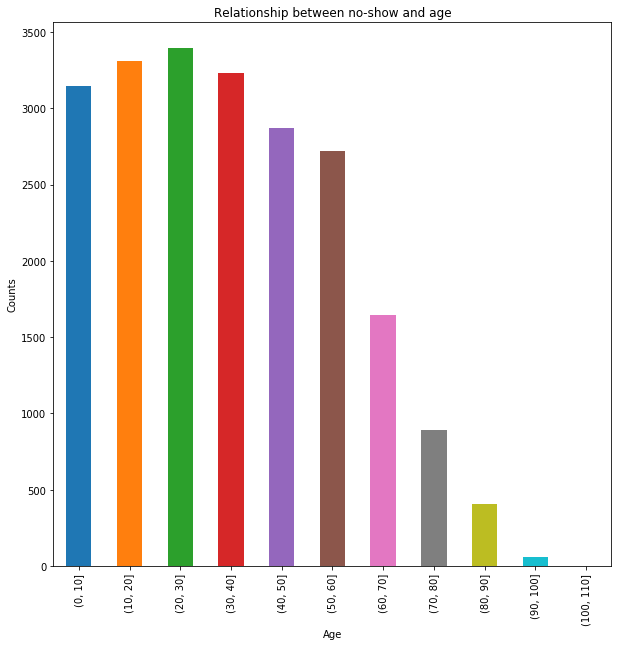

In [8]:
# 年龄分段
bins_age = np.arange(0, data_analysis['Age'].max(), 10)
group_age = pd.cut(data_analysis['Age'], bins=bins_age, right=True)
data_age = data_analysis.groupby(group_age).sum()['No-show']

# 绘制关系图
plt.figure(figsize=(10,10))
data_age.plot(kind='bar')
plt.title("Relationship between no-show and age")
plt.ylabel('Counts')
plt.show()

1. 未前往就诊是否与预约病人年纪有关？  
这里以性别年龄为自变量，是否就诊为因变量。根据图表可以发现，青年阶段的病人已预约但未前往就诊的次数最多，老人最少。这个和各个年龄阶段的病人数量也相关，大于90岁的病人本身数量也少。未前往就诊与病人的年纪相关性不是很强。因此不能说明未前往就诊和病人年级有关。  

### 研究问题 2： 未前往就诊是否与预约病人性别有关？

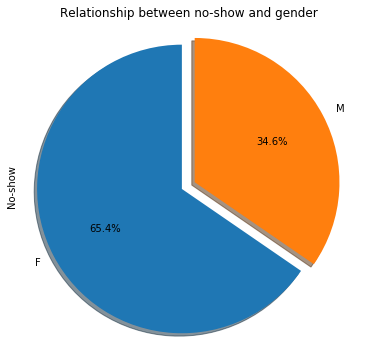

In [9]:
# 提取数据
labels = data_analysis['Gender'].unique()
sizes = data_analysis.groupby('Gender').sum()['No-show']
explode = [0,0.1]

# 绘制关系图
plt.figure(figsize=(6,6))
sizes.plot(kind='pie', explode=explode, autopct='%1.1f%%',shadow=True, startangle=90)
plt.title("Relationship between no-show and gender")
plt.axis('equal') # 显示为圆形
plt.show()

2. 未前往就诊是否与预约病人性别有关？  
这里以性别为自变量，是否就诊为因变量进行分析。根据图表，女性未前往就诊的比例为65.4%，男性为34.6%，显然未前往就诊是否与预约病人性别有关。  

### 研究问题 3： 未前往就诊是否与病人预约时间有关？

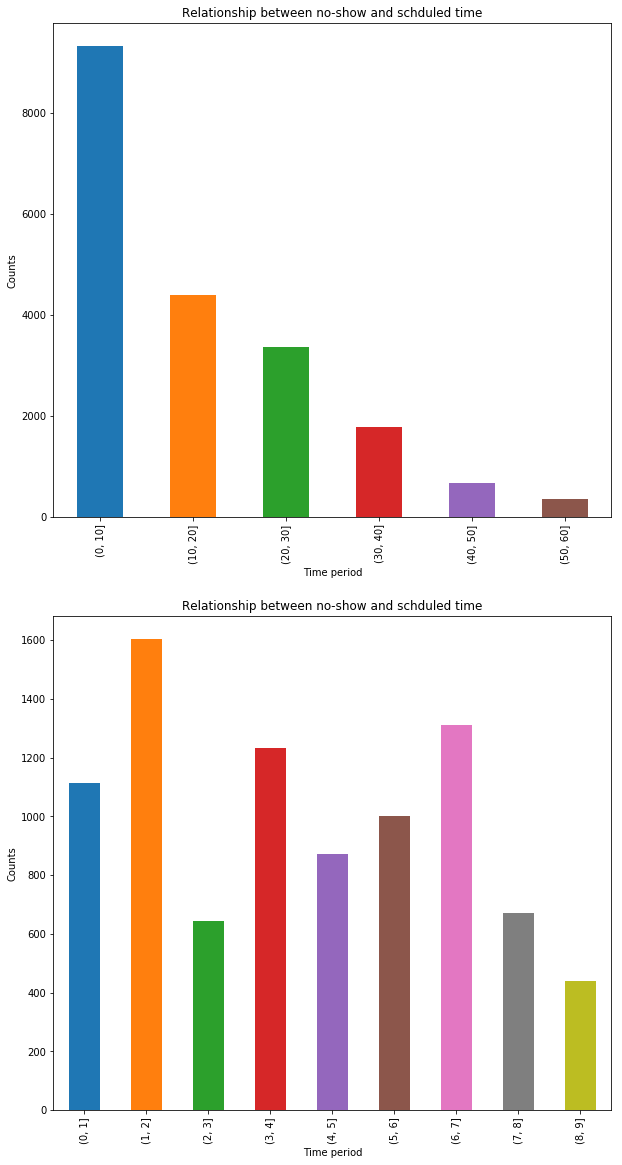

In [10]:
# 预约就诊时间和约定时间差值
ahead_of_scheduled_time = data_analysis['AppointmentDay'] - data_analysis['ScheduledDay']
# 转化成天数(包含小时数)
ahead_of_scheduled_day = ahead_of_scheduled_time.dt.total_seconds()/(24*60*60)

# 按时间分组
# 以两个月为时间界限观察，ahead_of_scheduled_time.max()最大为178天，根据观察，大于60天之后数据量很少。
bins_time = np.arange(0,70,10)
group_time = pd.cut(ahead_of_scheduled_day, bins_time)
data_time = data_analysis.groupby(group_time).sum()['No-show']

# 绘图
plt.figure(figsize=(10,20))
plt.subplot(211)
plt.title("Relationship between no-show and schduled time")
data_time.plot(kind='bar')
plt.ylabel('Counts')
plt.xlabel('Time period')

# 观察时间差为10天内的情况
bins_time = np.arange(0,10,1)
group_time = pd.cut(ahead_of_scheduled_day, bins_time)
data_time = data_analysis.groupby(group_time).sum()['No-show']

# 绘图
plt.subplot(212)
plt.title("Relationship between no-show and schduled time")
data_time.plot(kind='bar')
plt.ylabel('Counts')
plt.xlabel('Time period')
plt.show()

3. 未前往就诊是否与预约时间有关系？  
这里以预约就诊和约定就诊时间差为自变量，病人是否就诊为因变量。根据图表，未前往就诊的情况主要集中在提前预约10天以内，随着预约时间差的加长，未前往就诊情况减少。但细化10天内数据，发现相关性不明显。 因此可以说明，未前往就诊与预约时间有关系，在10天内的预约时间差，出现未前往就诊的情况最多。

<a id='conclusions'></a>
## 结论

> **提示**：最后，你需要总结自己的调查结果。请确保你了解在探索过程中的局限性。如果尚未进行任何统计检验，不要做出任何统计结论。切记不要根据相关关系贸然推导出因果关系！

> **提示**：如果你对自己的研究成果感到满意，应将其副本保存为 HTML 或 PDF 形式。在导出报告之前请检查一遍，确保报告结构完整，信息连贯。应删除所有类似的“提示”引用段，以保持报告中的简洁度。在提交之前，你还需要查看在课程结尾的项目提交页面中的项目审阅规范。

> 如需将报告导出到工作区，你可以运行下面的代码框。如果正确，会返回代码 0，工作区目录下会生成 .html 文件（单击左上角的 jupyter 图标）。也可以通过 **文件** > **下载为** 子菜单下载 html 报告，然后手动上传到工作区目录。完成之后，可以单击右下角的“提交项目”，来提交你的项目。恭喜你！

1. 根据数据探索可视化的部分，可以发现病人是否前往就诊与病人年纪、性别和预约就诊时间差的关系。  
2. 在分析过程中，采用控制变量法，每次分别取数据的两个子集进行分析，如病人是否出现就诊（No-show）和病人年纪（Age）。上述每个子集，能有效支持问题的分析。主要是因为选择的三个自变量，基本上是独立的，与与其它未分析变量之间的相关性不强（可以使用相关性分析说明）。因此得出的结论是可以支持问题分析的。    
3. 对于异常值的分析。在分析预约时间差的过程中，会出现时间差为负数的情况，及约定时间早于预约就诊时间，这显然是不对的。但在分析中，我采用时间分组的形式，从0开始分析，自动过滤了异常值，也不会对结论产生影响。  
4. 改进：在本项目分析中，主要是对频率进行统计分析。以频率除以基数分析，也是一种有效分析方式。  

In [11]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255